Epoch 1/20 - Train Loss: 0.0633
Epoch 2/20 - Train Loss: 0.0431
Epoch 3/20 - Train Loss: 0.0397
Epoch 4/20 - Train Loss: 0.0380
Epoch 5/20 - Train Loss: 0.0371
Epoch 6/20 - Train Loss: 0.0365
Epoch 7/20 - Train Loss: 0.0360
Epoch 8/20 - Train Loss: 0.0357
Epoch 9/20 - Train Loss: 0.0354
Epoch 10/20 - Train Loss: 0.0352
Epoch 11/20 - Train Loss: 0.0350
Epoch 12/20 - Train Loss: 0.0348
Epoch 13/20 - Train Loss: 0.0346
Epoch 14/20 - Train Loss: 0.0345
Epoch 15/20 - Train Loss: 0.0344
Epoch 16/20 - Train Loss: 0.0343
Epoch 17/20 - Train Loss: 0.0342
Epoch 18/20 - Train Loss: 0.0341
Epoch 19/20 - Train Loss: 0.0340
Epoch 20/20 - Train Loss: 0.0339


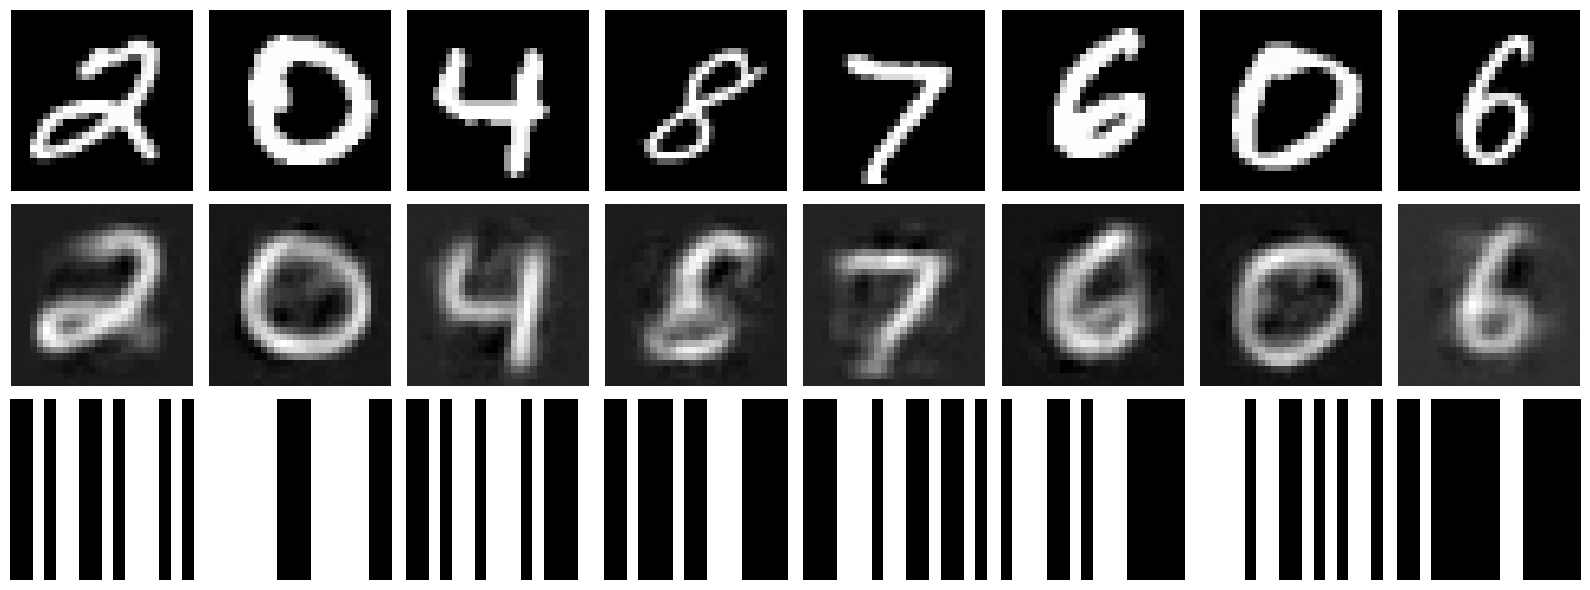

2025-04-04 11:40:03.602571: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [1]:
from jax import random, lax
import optax
import matplotlib.pyplot as plt
from datasets.mnist import MNISTDataset
from src.autoencoders.simple_vae import model
from src.utils.autoencoder_trainer import AutoencoderTrainer

# Create a random key
rng = random.PRNGKey(0)
# Instantiate the binary VAE model with 20 latent dimensions
binary_vae = model(latents=16)
# Define input shape (e.g., batch of 64 images flattened to 784 features)
input_shape = (64, 784)
# Set learning rate
learning_rate = 3e-4

# Load MNIST dataset for training and testing
train_dataset = MNISTDataset(split='train', batch_size=64, image_size=(28, 28)).load()
test_dataset = MNISTDataset(split='test', batch_size=64, image_size=(28, 28)).load()

# Create an instance of the trainer with your binary VAE model
trainer = AutoencoderTrainer(binary_vae, learning_rate, rng, input_shape)

# Train the model for 10 epochs
trainer.train(train_dataset, batch_size=64, num_epochs=20)

# Plot some reconstructions from the test dataset
trainer.plot_reconstructions(test_dataset, num_images=8)